<center><h1>Walmart Sales Forecasting</h1></center>

> <h3>Importing required data and libraries</h3>

In [2]:
import pandas as pd                # pandas to use dataframes                         
import numpy as np                 # to implement array operations
from datetime import datetime
import matplotlib.pyplot as plt    # For plotting
%matplotlib inline    
import seaborn as sns

 > <h3>Other libraries to perform time series analysis</h3>

In [3]:
!pip install pmdarima
from statsmodels.tsa.stattools import adfuller
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

> <h3>Importing Data</h3>

In [4]:
store_data = pd.read_csv('stores.csv')
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
feature_dt = pd.read_csv('features.csv')
feature_dt.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


> <h3>Merging the above 3 datastes into a single dataframe</h3>

In [8]:
raw_data = train_data.merge(feature_dt, on=['Store', 'Date'], how='inner').merge(store_data, on=['Store'], how='inner')


In [9]:
raw_data.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

raw_data.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

raw_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [8]:
raw_data.shape

(421570, 16)

In [9]:
raw_data['Store'].nunique()

45

In [10]:
raw_data['Dept'].nunique()

81

> <h3>Store-wise and Department wise sales</h3>

In [11]:
store_dept = pd.pivot_table(raw_data, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


> <h3>Checking for sales data and removing the data which is meaningless (negative sales)</h3>

In [12]:
raw_data.loc[raw_data['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


In [13]:
raw_data = raw_data.loc[raw_data['Weekly_Sales'] > 0]

In [14]:
raw_data.shape

(420212, 16)

In [15]:
raw_data['Date'].head(5).append(raw_data['Date'].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

> <h3>Analyzing Holdiday Trends</h3>

<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

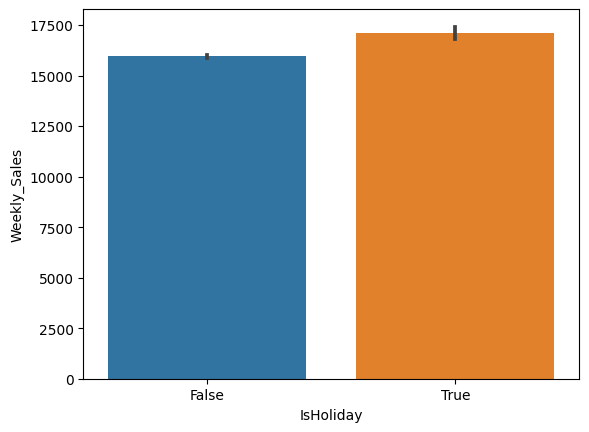

In [16]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=raw_data)

In [17]:
raw_data_holiday = raw_data.loc[raw_data['IsHoliday']==True]
raw_data_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [18]:
raw_data_not_holiday = raw_data.loc[raw_data['IsHoliday']==False]
raw_data_not_holiday['Date'].nunique() 

133

In [19]:
# Super bowl dates in train set
raw_data.loc[(raw_data['Date'] == '2010-02-12')|(raw_data['Date'] == '2011-02-11')|(raw_data['Date'] == '2012-02-10'),'Super_Bowl'] = True
raw_data.loc[(raw_data['Date'] != '2010-02-12')&(raw_data['Date'] != '2011-02-11')&(raw_data['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [20]:
# Labor day dates in train set
raw_data.loc[(raw_data['Date'] == '2010-09-10')|(raw_data['Date'] == '2011-09-09')|(raw_data['Date'] == '2012-09-07'),'Labor_Day'] = True
raw_data.loc[(raw_data['Date'] != '2010-09-10')&(raw_data['Date'] != '2011-09-09')&(raw_data['Date'] != '2012-09-07'),'Labor_Day'] = False

In [21]:
# Thanksgiving dates in train set
raw_data.loc[(raw_data['Date'] == '2010-11-26')|(raw_data['Date'] == '2011-11-25'),'Thanksgiving'] = True
raw_data.loc[(raw_data['Date'] != '2010-11-26')&(raw_data['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [22]:
#Christmas dates in train set
raw_data.loc[(raw_data['Date'] == '2010-12-31')|(raw_data['Date'] == '2011-12-30'),'Christmas'] = True
raw_data.loc[(raw_data['Date'] != '2010-12-31')&(raw_data['Date'] != '2011-12-30'),'Christmas'] = False

<AxesSubplot: xlabel='Christmas', ylabel='Weekly_Sales'>

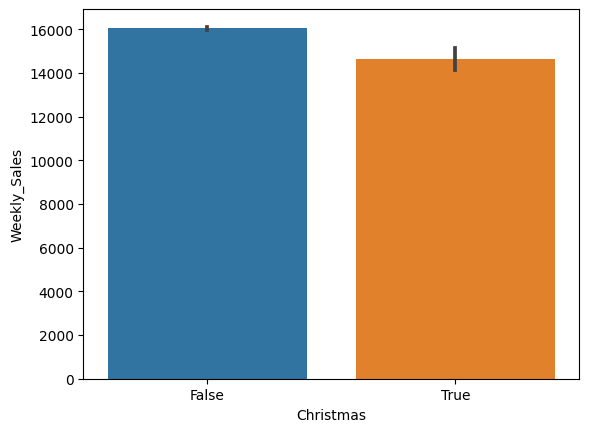

In [23]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=raw_data) # Christmas holiday vs not-Christmas

<AxesSubplot: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

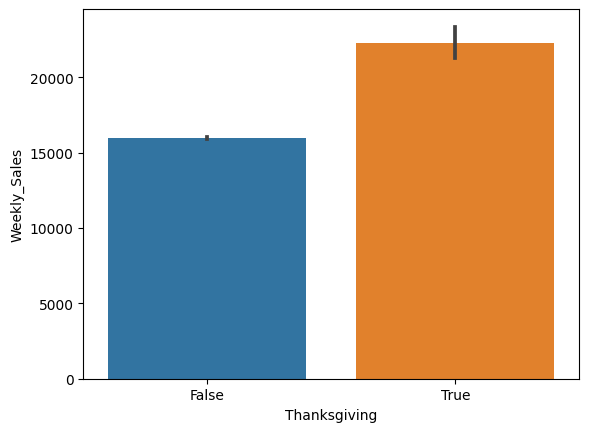

In [24]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=raw_data) # Thanksgiving holiday vs not-thanksgiving

<AxesSubplot: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

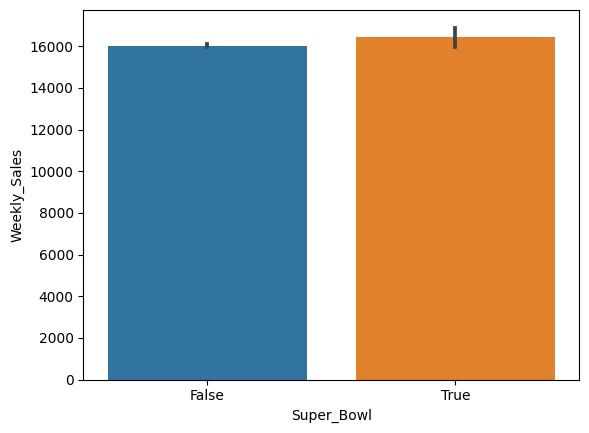

In [25]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=raw_data) # Super bowl holiday vs not-super bowl

<AxesSubplot: xlabel='Labor_Day', ylabel='Weekly_Sales'>

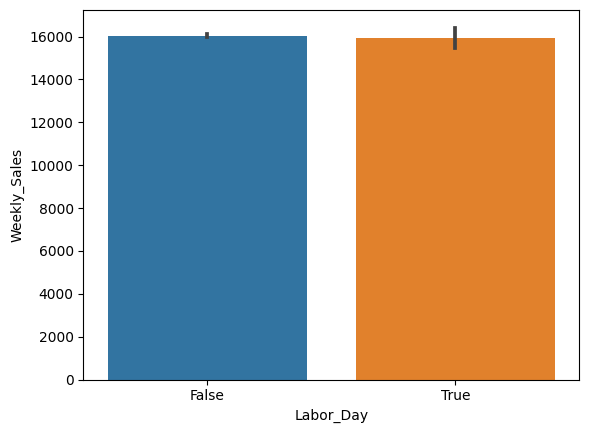

In [26]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=raw_data) # Labor day holiday vs not-labor day

<b>Holiday trend conclusion</b>: 

From the graphs, it is clear that Labor Day and Christmas do not increase weekly average sales. However, there is positive effect on sales in Super bowl, but the highest difference is observed during Thanksgiving. Which makes sense as people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

> <h3>Analyzing Store wise  and store type sales</h3>

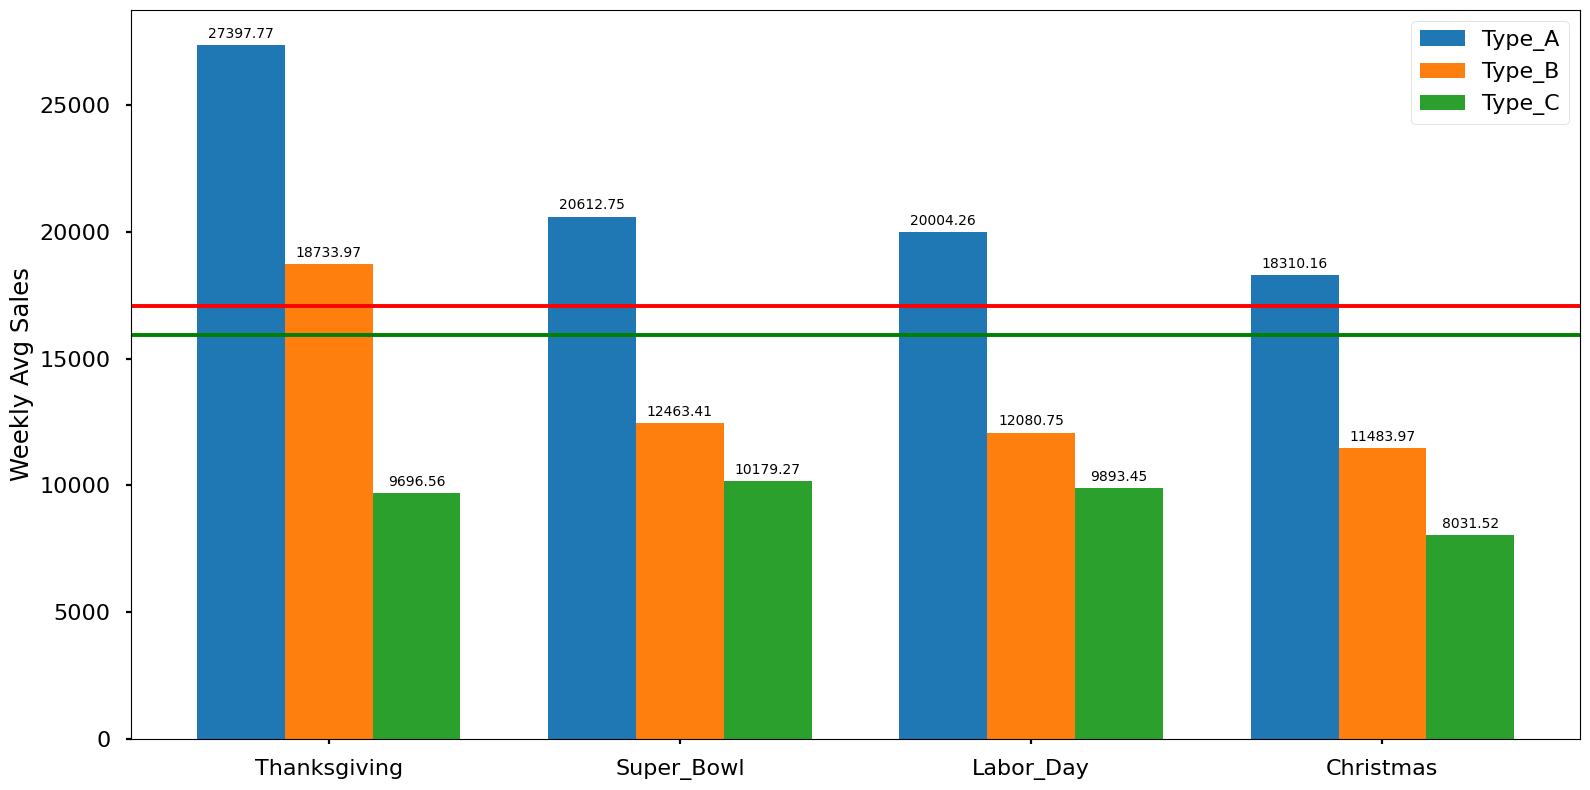

In [27]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

From the graph, it is clear that highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales and the reason for this is that the size of the store A is large and hence justifies the huge sales

In [28]:
raw_data.isna().sum() # last null check

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

> <h3>Deeper look into Weekly, Monthly and Yearly Sales</h3>

In [29]:
raw_data["Date"] = pd.to_datetime(raw_data["Date"]) # convert to datetime
raw_data['week'] =raw_data['Date'].dt.week
raw_data['month'] =raw_data['Date'].dt.month 
raw_data['year'] =raw_data['Date'].dt.year

In [30]:
raw_data.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [31]:
raw_data.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<AxesSubplot: xlabel='month'>

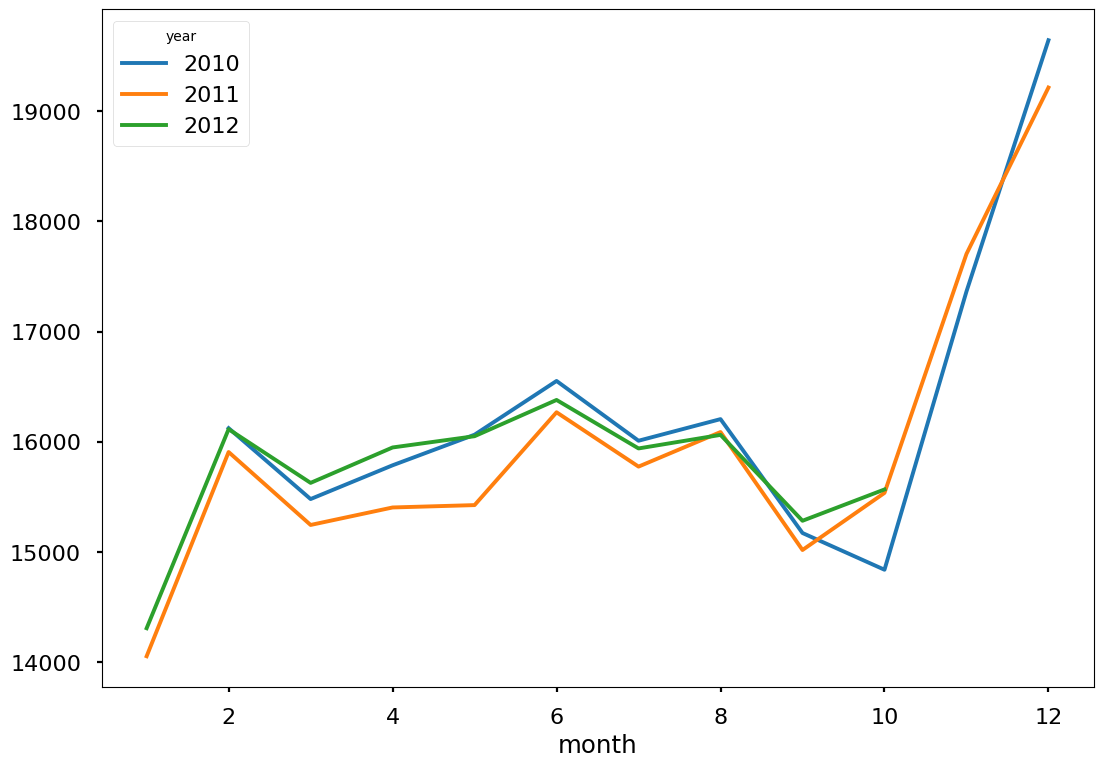

In [32]:
monthly_sales = pd.pivot_table(raw_data, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

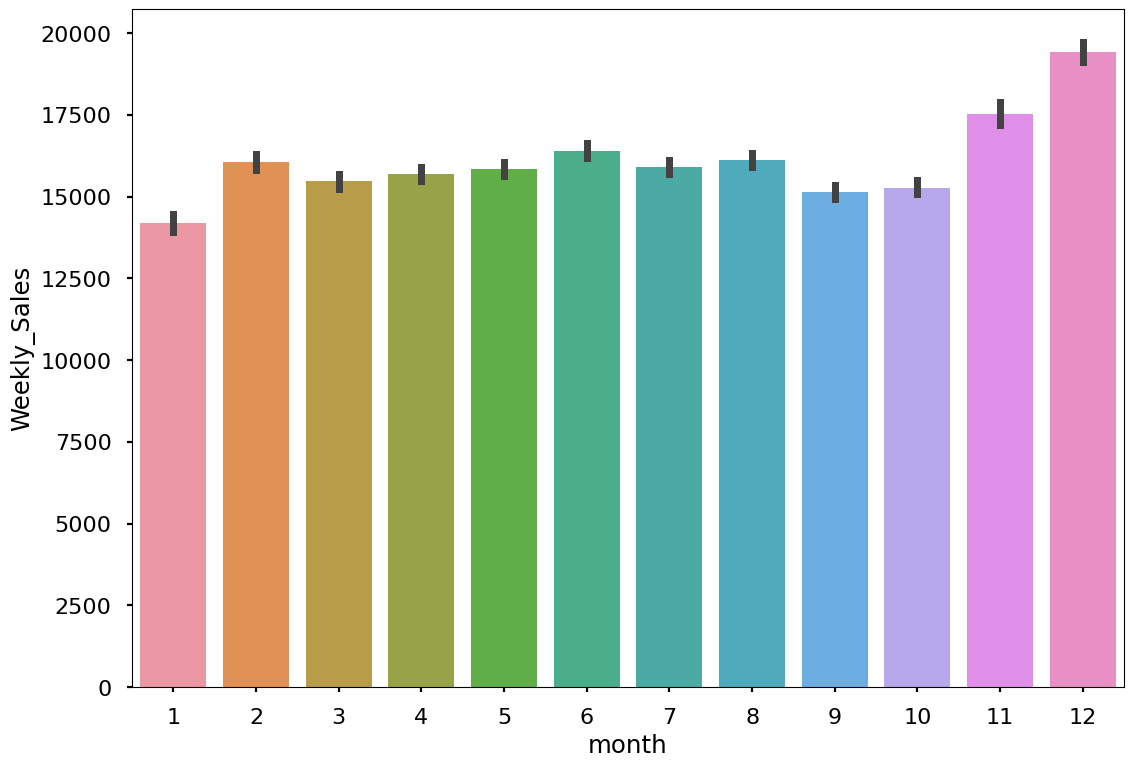

In [33]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=raw_data)

In [34]:
raw_data.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<AxesSubplot: xlabel='week'>

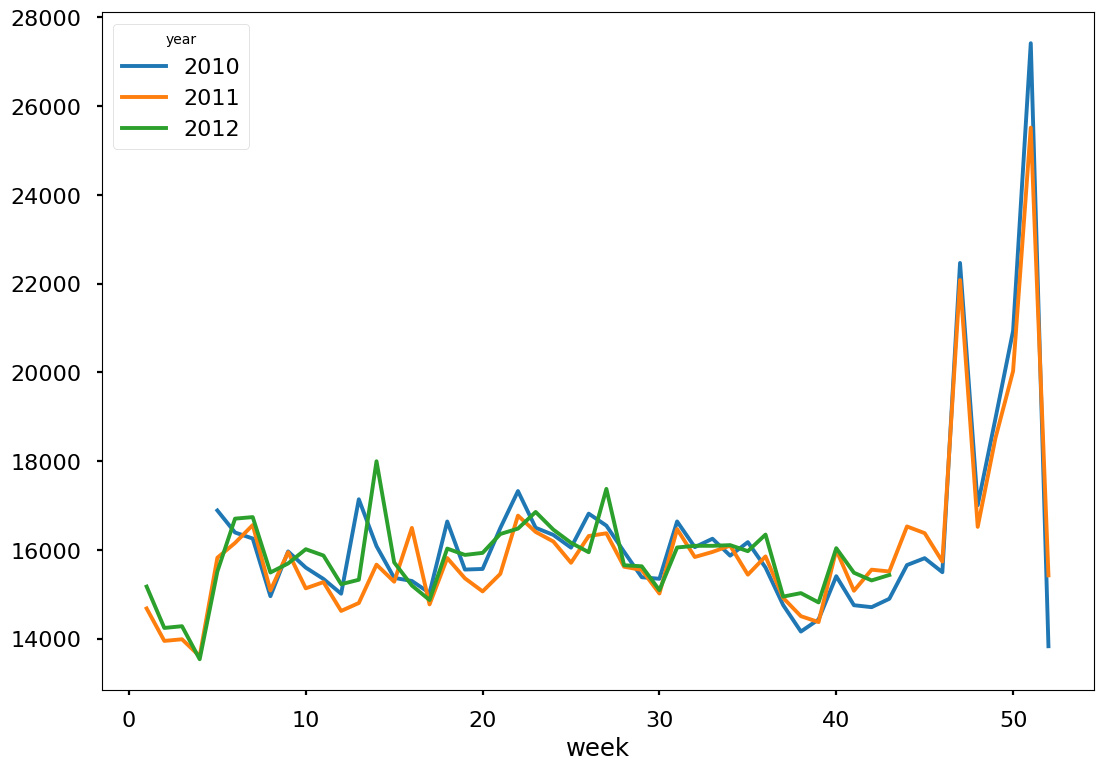

In [35]:
weekly_sales = pd.pivot_table(raw_data, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

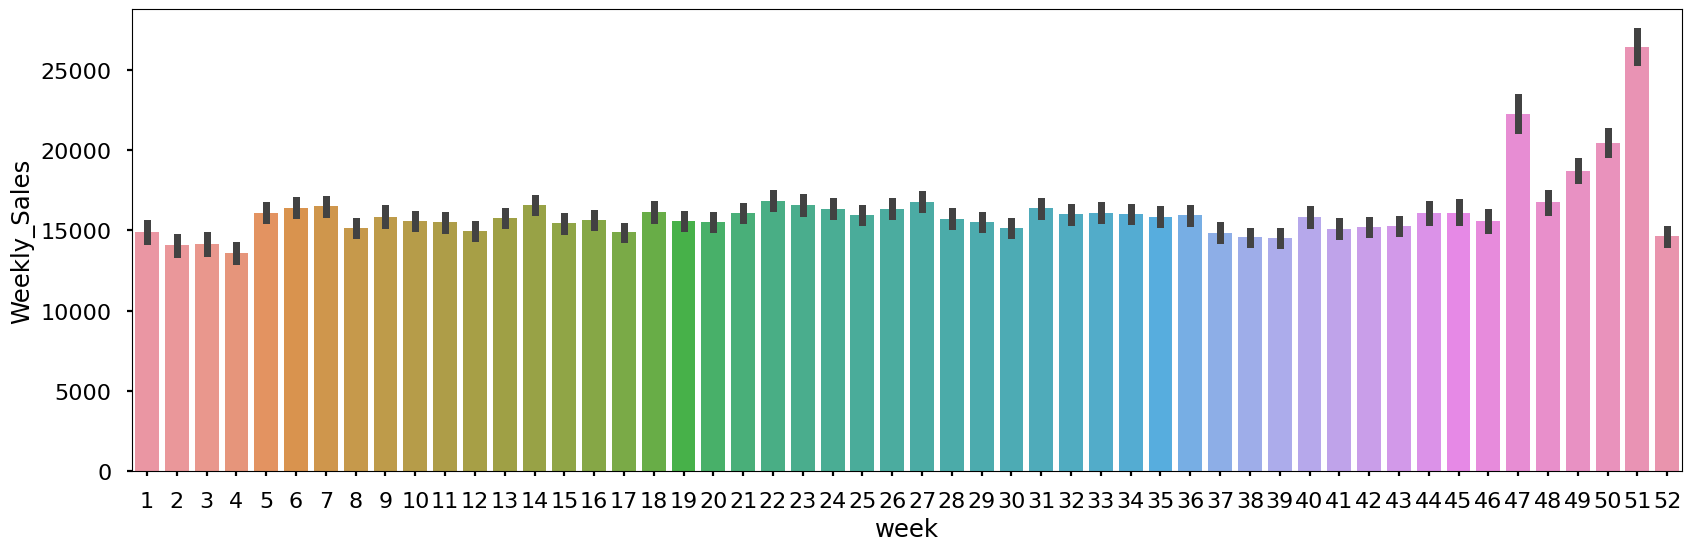

In [36]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=raw_data)

From the graphs, it is seen that 2011 has lower sales than 2010 generally. When we look at the mean sales it is seen that 2010 has higher values, but 2012 has no information about November and December which have higher sales. Despite of 2012 has no last two months sales, it's mean is near to 2010. Most probably, it will take the first place if we get 2012 results and add them.

> <h3>Creating New Dataset after all the transformations</h3>

In [37]:
raw_data.to_csv('Walmart_Clean_Data.csv') # assign new data frame to csv for using after here

In [38]:
pd.options.display.max_columns=100 # to see columns 

In [39]:
data = pd.read_csv('Walmart_Clean_Data.csv')

In [40]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [41]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [42]:
data['Date'] = pd.to_datetime(data['Date']) # changing datetime to divide if needs

> <h3>Converting holiday data into numerical values</h3>

In [43]:
data_encoded = data.copy() # to keep original dataframe taking copy of it

In [44]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
data_encoded['Type'] = data_encoded['Type'].replace(type_group)

In [45]:
data_encoded['Super_Bowl'] = data_encoded['Super_Bowl'].astype(bool).astype(int) # changing T,F to 0-1

In [46]:
data_encoded['Thanksgiving'] = data_encoded['Thanksgiving'].astype(bool).astype(int) # changing T,F to 0-1

In [47]:
data_encoded['Labor_Day'] = data_encoded['Labor_Day'].astype(bool).astype(int) # changing T,F to 0-1

In [48]:
data_encoded['Christmas'] = data_encoded['Christmas'].astype(bool).astype(int) # changing T,F to 0-1

In [49]:
data_encoded['IsHoliday'] = data_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1

In [50]:
data_new = data_encoded.copy() # taking the copy of encoded df to keep it original

In [51]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
data_new.drop(drop_col, axis=1, inplace=True) # dropping columns

> <h3>Checking the correlations</h3>

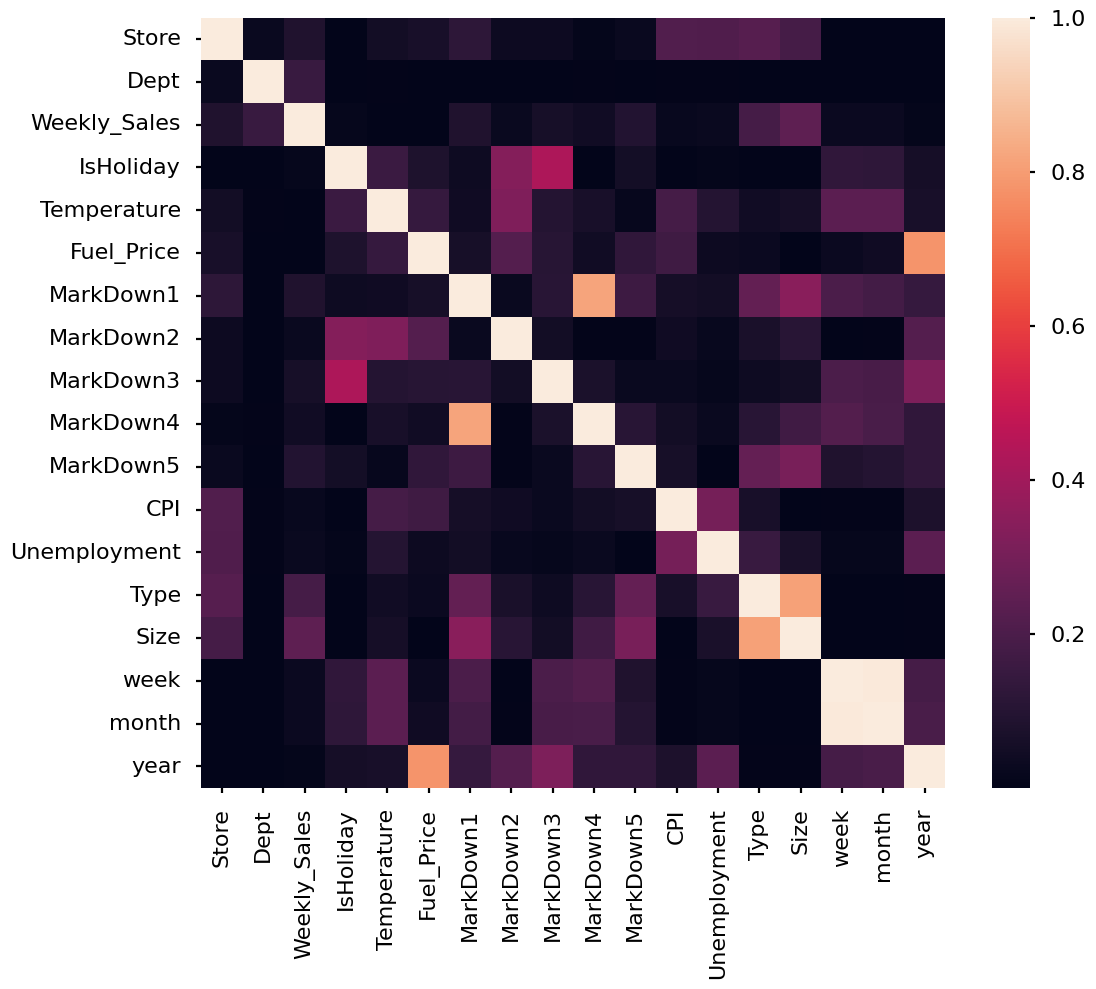

In [52]:
plt.figure(figsize = (12,10))
sns.heatmap(data_new.corr().abs())    # To see the correlations
plt.show()

In [53]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
data_new.drop(drop_col, axis=1, inplace=True) # dropping columns

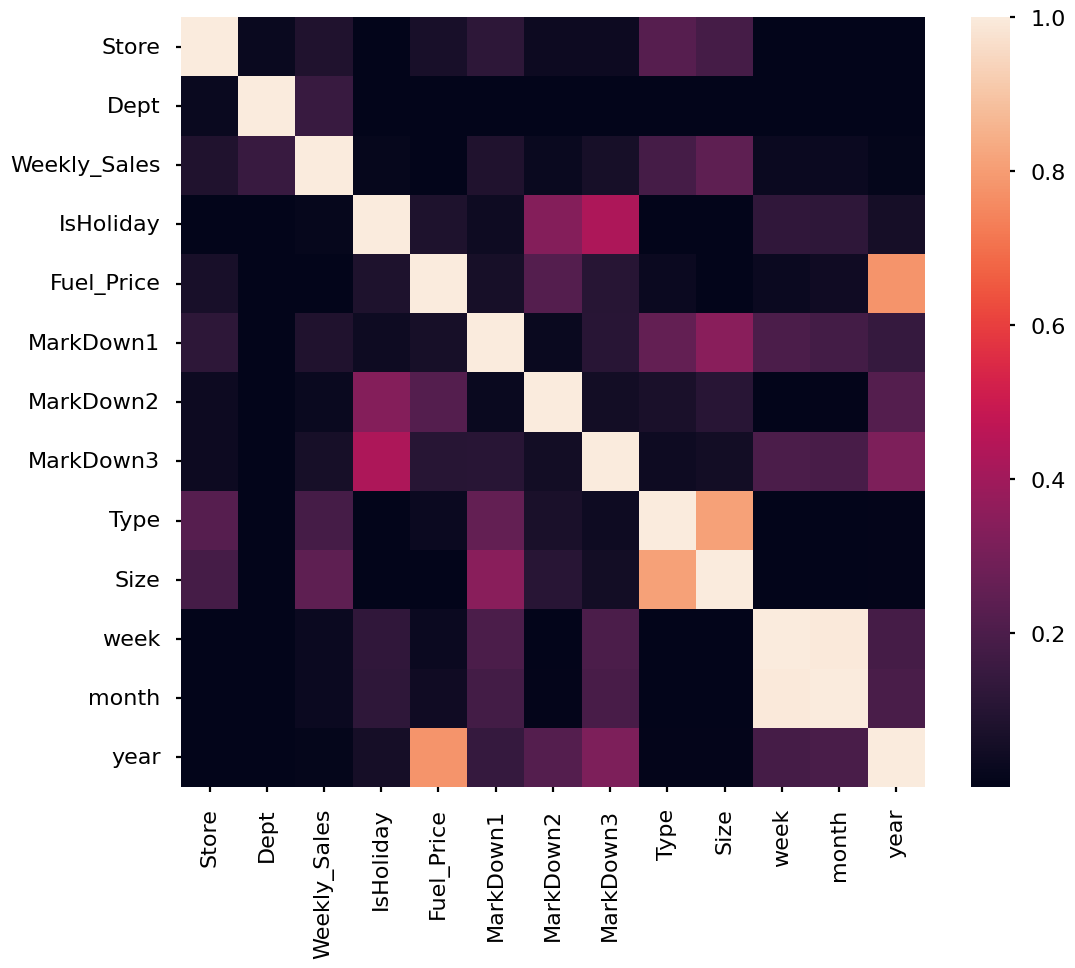

In [54]:
plt.figure(figsize = (12,10))
sns.heatmap(data_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

> <h2>Time Series Analysis</h2>

In [55]:
# reading the data
data=pd.read_csv('Walmart_Clean_Data.csv')

In [56]:
# overview of the data
data.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [57]:
# removing unnecessary columns
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [58]:
data["Date"] = pd.to_datetime(data["Date"])

In [59]:
# filtering out negative sales values
data = data[data['Weekly_Sales'] > 0]

In [60]:
# making the date column as index to make the analysis easy
data.set_index('Date', inplace=True)

In [61]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,3,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,4,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,5,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


> <h3>Plotting the sales data</h3>

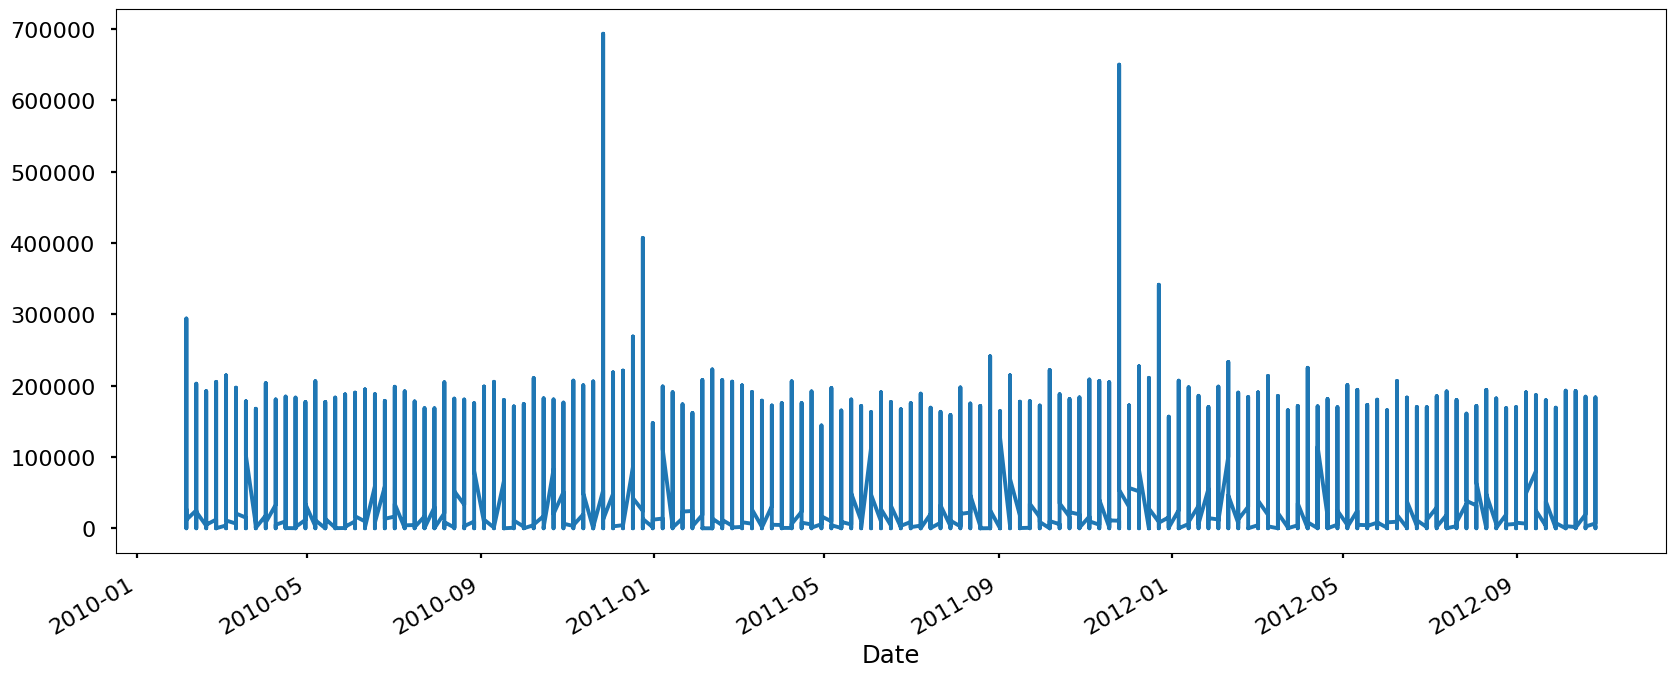

In [62]:
# plotting the sales data
plt.figure(figsize=(20,8))
data['Weekly_Sales'].plot()
plt.show()

The above sales plot contains many repititive values hence converting it into weekly sales data

In [63]:
df_week = data.groupby(['Date']).mean()

In [64]:
df_week

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,22.040394,44.161236,16887.602166,0.0,33.282800,2.717968,NaN,NaN,NaN,NaN,NaN,167.328549,8.578592,137381.684997,0.0,0.0,0.0,0.0,5.0,2.0,2010.0
2010-02-12,22.006443,44.331638,16390.912208,1.0,33.370444,2.695955,NaN,NaN,NaN,NaN,NaN,167.401961,8.567855,137675.080027,1.0,0.0,0.0,0.0,6.0,2.0,2010.0
2010-02-19,22.044444,44.287542,16255.185970,0.0,37.032596,2.673506,NaN,NaN,NaN,NaN,NaN,167.386208,8.574593,137277.810101,0.0,0.0,0.0,0.0,7.0,2.0,2010.0
2010-02-26,22.021088,44.058844,14955.932194,0.0,38.624806,2.685486,NaN,NaN,NaN,NaN,NaN,167.708233,8.562094,137365.977551,0.0,0.0,0.0,0.0,8.0,2.0,2010.0
2010-03-05,22.056199,44.019755,15964.821240,0.0,42.367490,2.731923,NaN,NaN,NaN,NaN,NaN,167.680036,8.573890,137556.273161,0.0,0.0,0.0,0.0,9.0,3.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,22.227981,44.099932,14815.621125,0.0,68.163750,3.858017,4895.531619,24.627533,6.803289,1925.612950,4246.619665,175.983576,7.222354,136080.131775,0.0,0.0,0.0,0.0,39.0,9.0,2012.0
2012-10-05,22.250506,44.518543,16037.442175,0.0,65.444187,3.848344,5129.483192,NaN,21.173513,3185.499274,3623.048483,176.007152,6.940703,136517.424140,0.0,0.0,0.0,0.0,40.0,10.0,2012.0
2012-10-12,22.203760,44.574018,15484.696200,0.0,57.678090,3.896989,1956.173911,NaN,17.310554,644.969810,5608.688929,176.161362,6.949037,136284.739846,0.0,0.0,0.0,0.0,41.0,10.0,2012.0


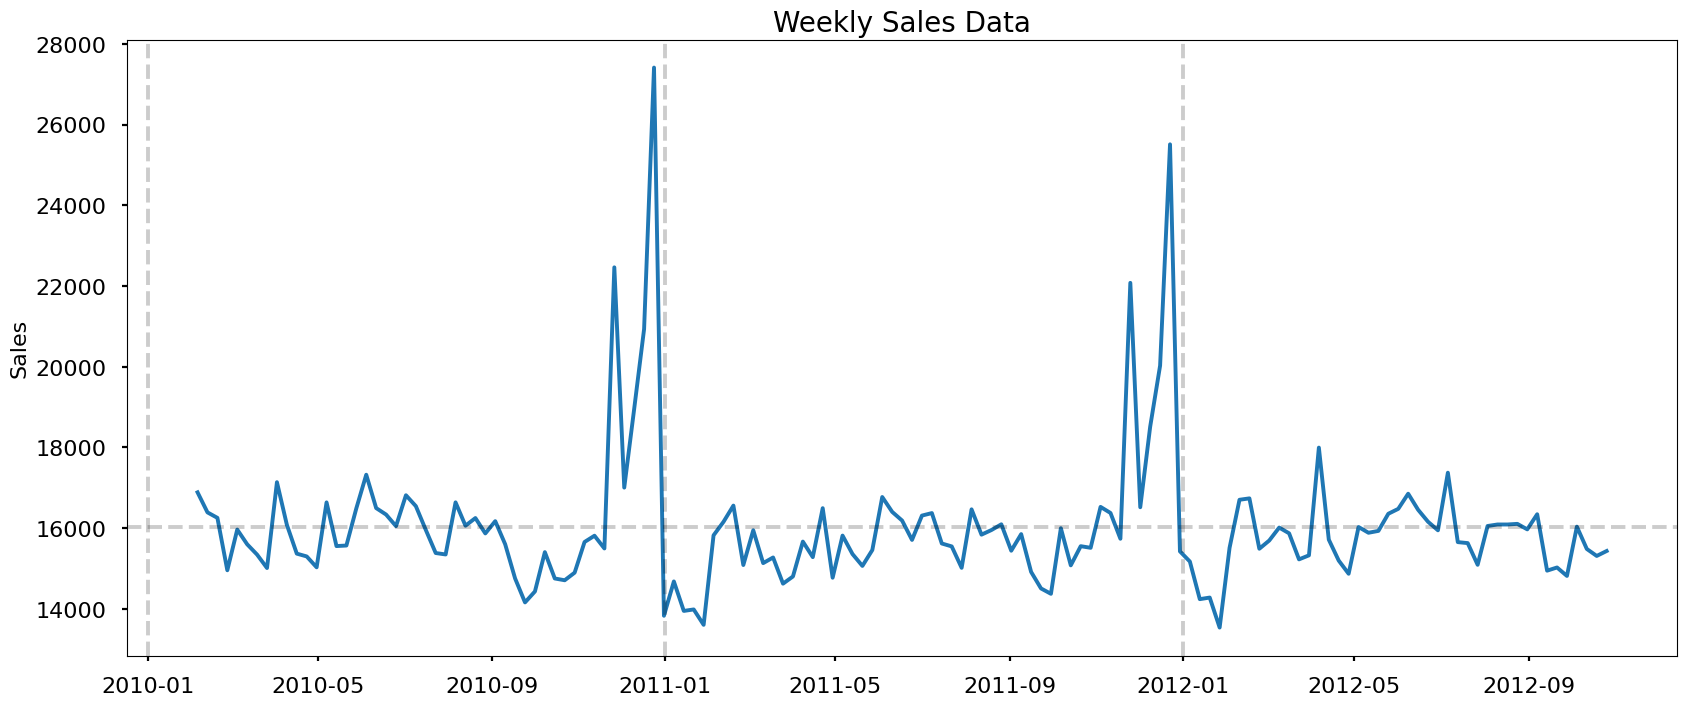

In [65]:
# plotting weekly sales data
start_date = datetime(2010, 2, 5)
end_date = datetime(2013, 10, 26)
plt.figure(figsize=(20,8))
plt.plot(df_week['Weekly_Sales'])
plt.title('Weekly Sales Data', fontsize =20)
plt.ylabel('Sales', fontsize =16)
plt.axhline(df_week['Weekly_Sales'].mean(), color ='k', linestyle='--', alpha =0.2)

for year in range(start_date.year, end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color ='k', linestyle='--', alpha =0.2)

The above weekely plot is a good time series process. However, the mean of the time series is not constant and it can be seen that there is an yearly seasonal trend

In [66]:
# function to perform augmented dickey fuller test to test the stationarity of the time series
def adfuller_test(series):
  result = adfuller(series)
  labels = ['ADF Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used']
  for value, label in zip(result, labels):
    print(label + ': ' + str(value))
  
  if result[1] <= 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [67]:
# performing ADF test
adfuller_test(df_week['Weekly_Sales'])

ADF Test Statistic: -5.927107223737571
p-value: 2.4290492082042356e-07
Number of Lags Used: 4
Number of Observations Used: 138
Stationary


> <h3>Decomposition Graphs to check Trends</h3>

In [68]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=52) #decomposing of weekly data 

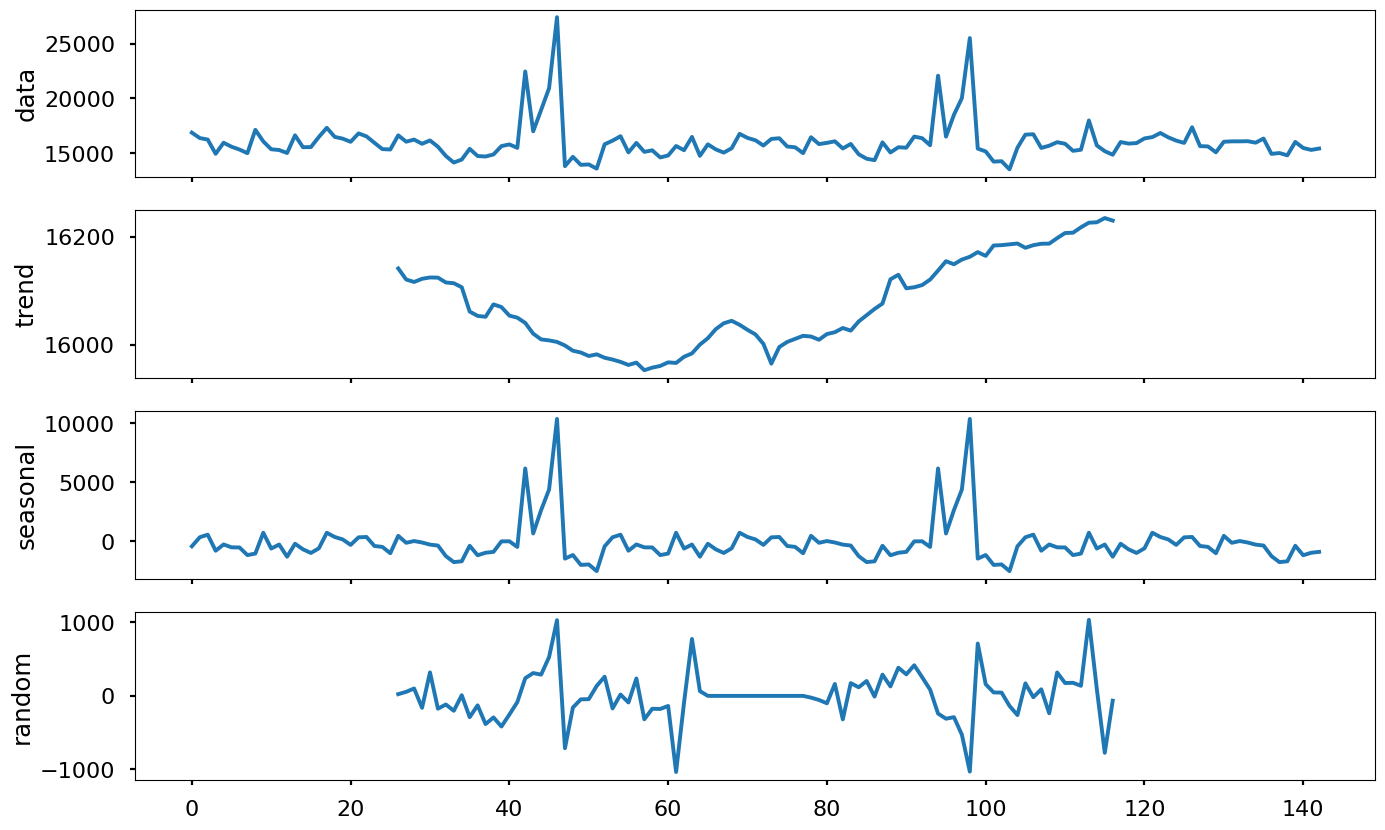

In [69]:
# plotting the decompsotion of the time series
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the decomposing graphs it is seen that the series h an yearly seasonal trend

> <h2>Difference Model</h2>

As the mean is not constant, taking the  first difference to get it to a constant mean

In [70]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [71]:
# Splitting the data into train and test
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

> <h2>Train-test Split</h2>

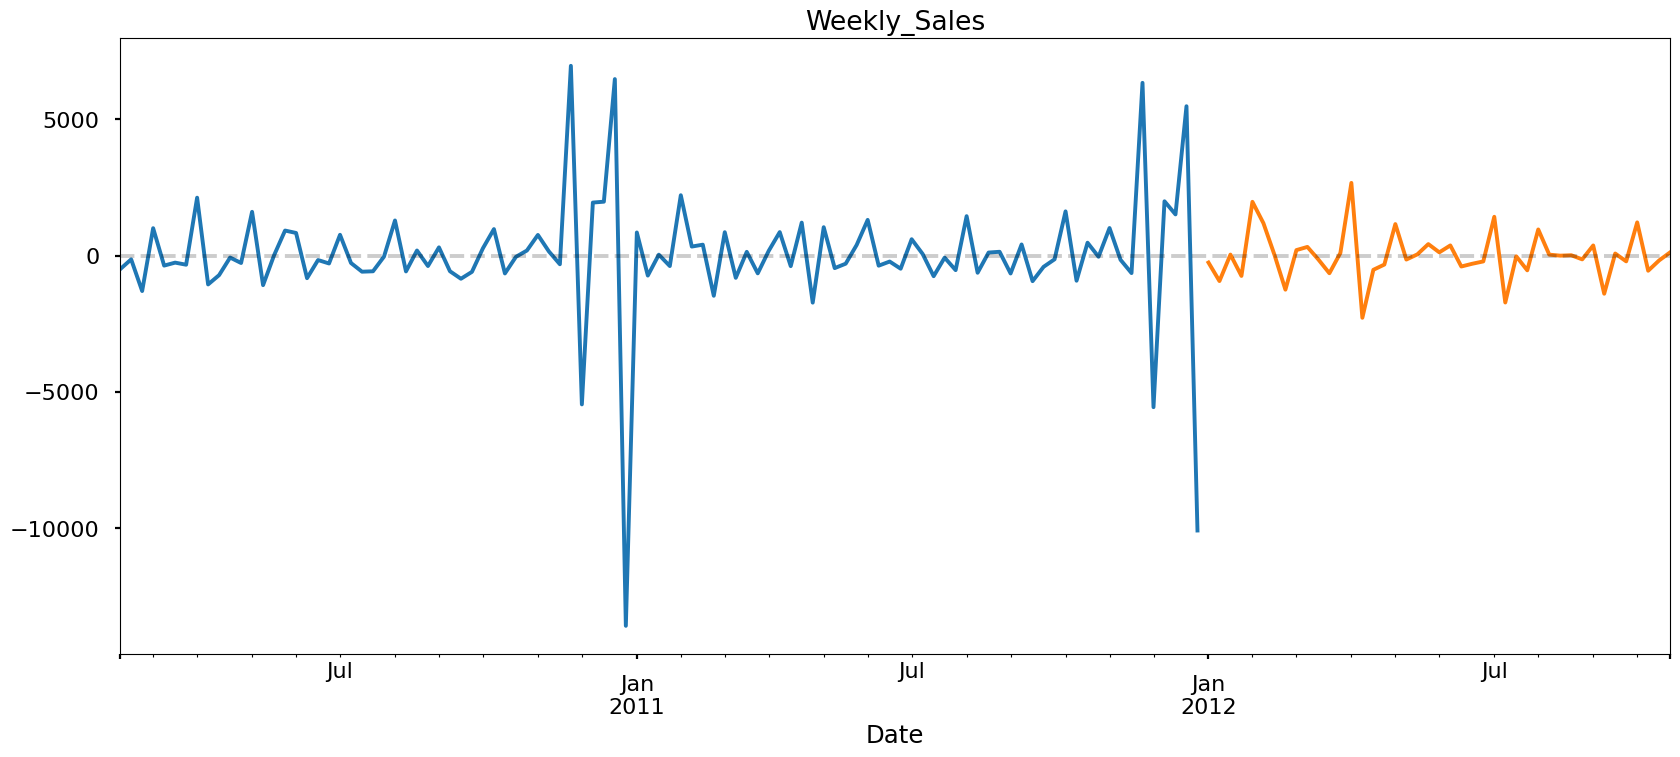

In [72]:
#plotting train and test data
train_data_diff.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=16)
test_data_diff.plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=16)
plt.axhline(0, color ='k', linestyle='--', alpha =0.2)
plt.show()

> <h2>ACF and PACF Plots</h2>

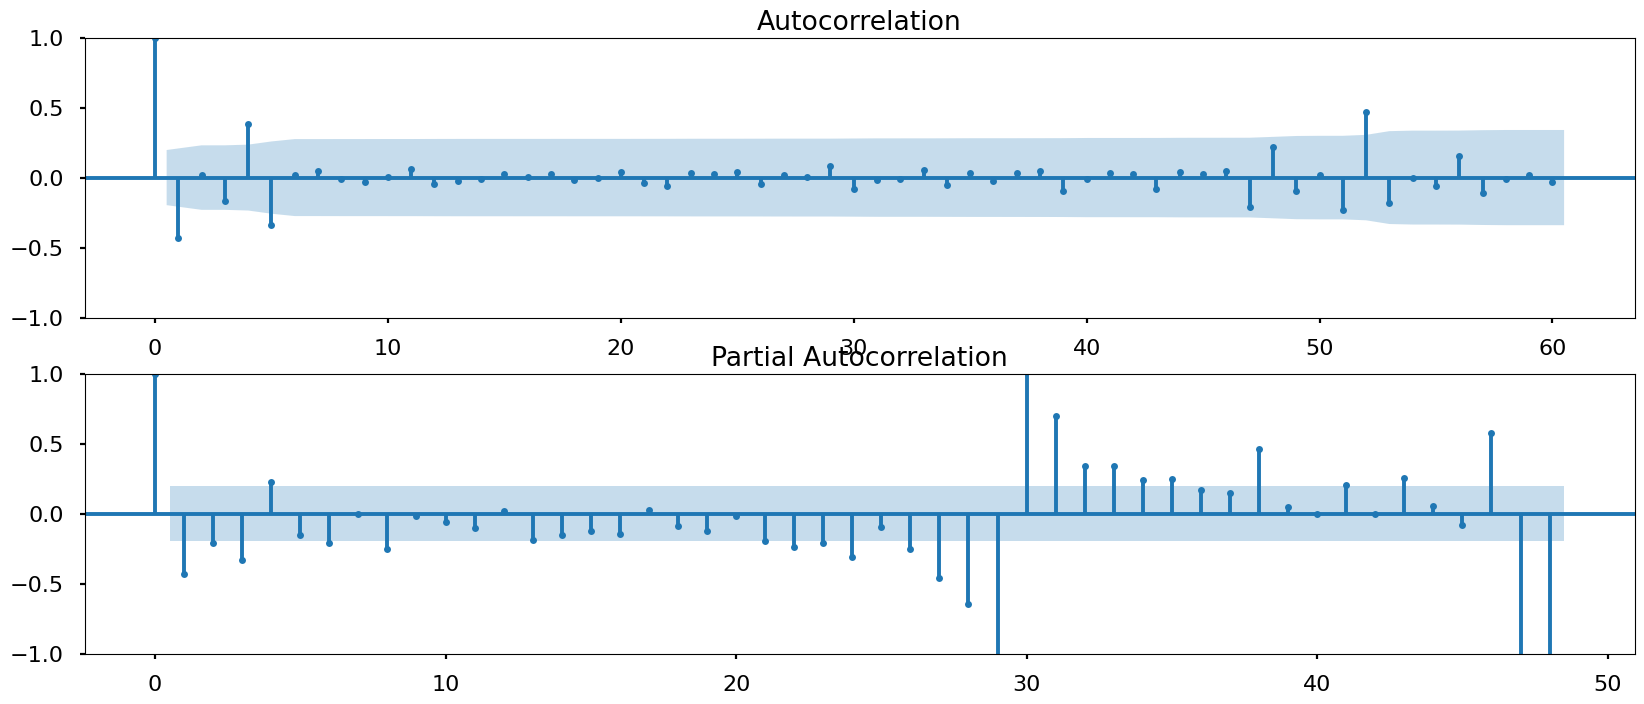

In [73]:
# plotting ACF and PACF plots to identify the lags of AR and MA process
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
acf = plot_acf(train_data_diff, lags =60, ax = ax1)
ax2 = fig.add_subplot(212)
pacf = plot_pacf(train_data_diff, lags =48, ax = ax2)

From the ACF plot, it can seen that it exhibits MA process and PACF plot, it can be seen that it has some AR process.
The strongest lag is observed at lag 52 (as it is yearly seasonal). Hence we can fit a seasonal ARIMA model with 52 weeks as the frequency

> <h2>SARIMA Model Fitting</h2>

In [74]:
my_order = (1,1,1)
my_seasonal_order = (1,0,0,52)
first_model = SARIMAX(train_data_diff, order=my_order, seasonal_order=my_seasonal_order)
first_model = first_model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.03663D+00    |proj g|=  1.69796D-01

At iterate    5    f=  8.92367D+00    |proj g|=  1.48545D-03

At iterate   10    f=  8.92240D+00    |proj g|=  5.47882D-04

At iterate   15    f=  8.92238D+00    |proj g|=  1.42337D-03

At iterate   20    f=  8.81340D+00    |proj g|=  3.11465D-01

At iterate   25    f=  8.54441D+00    |proj g|=  9.61710D-03
  ys=-3.456E-04  -gs= 6.803E-04 BFGS update SKIPPED

At iterate   30    f=  8.54396D+00    |proj g|=  6.62873D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [75]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                   99
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 52)   Log Likelihood                -845.852
Date:                             Sun, 11 Dec 2022   AIC                           1699.705
Time:                                     17:10:33   BIC                           1710.045
Sample:                                 02-12-2010   HQIC                          1703.887
                                      - 12-30-2011                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3986      0.055     -7.218      0.000      -0.507      -0.290
ma.L1         -1.0000      0.122     -8.189      0.000      -1.239      -0.761
ar.S.L52       0.9357      0.009    109.165      0.000       0.919       0.952
sigma2      6.153e+05   1.85e-07   3.33e+12      0.000    6.15e+05    6.15e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               259.51
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               4.23   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.07e+27. Standard errors may be unstable.
"""

From the summary, it can be seen that the p-values corresponding to the respective lags are very less indicating that they are significant

> <h2>Predictions and Residuals</h2>

In [76]:
predictions = first_model.forecast(len(test_data_diff))
predictions = pd.Series(predictions, index = test_data_diff.index)
residuals = test_data_diff - predictions

Text(0, 0.5, 'Error')

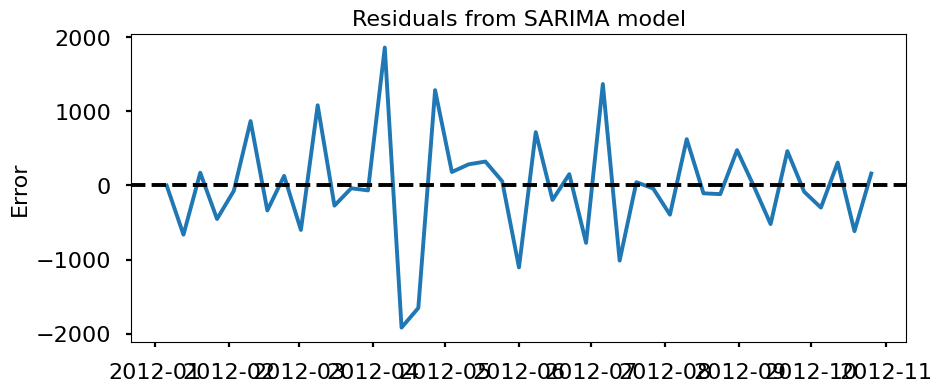

In [87]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA model', fontsize=16)
plt.ylabel('Error', fontsize=16)

The redidual plot doesnt have any pattern and has the mean zero indicating good predictions

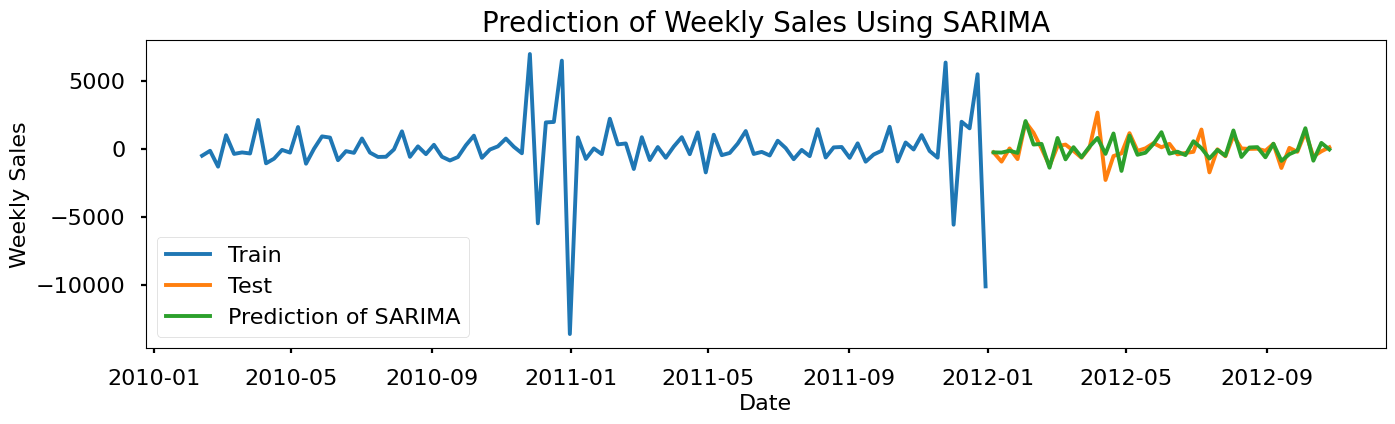

In [78]:
# plotting the predictions
plt.figure(figsize=(16,4))
plt.plot(train_data_diff, label='Train')
plt.title('Prediction of Weekly Sales Using SARIMA', fontsize=20)
plt.plot(test_data_diff, label='Test')
plt.plot(predictions, label='Prediction of SARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Weekly Sales', fontsize=16)
plt.show()

<b>From the predictions graph, it can be seen that the predicted values are closely following the original (test) values indicating that the model that we fitted is a good model</b>

In [79]:
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error:  717.6128394117306


> <h2>Future Predictions</h2>

Predicting for 24 weeks outside the dataset

In [80]:
prediction_dates = pd.date_range('2012-10-26', periods=24, freq='w')

In [81]:
future_dates = pd.DataFrame(prediction_dates, columns=['Date']).set_index('Date')

In [82]:
# fitting the same model but this time entire data rather than just train data
my_order = (1,1,1)
my_seasonal_order = (1,0,0,52)
second_model = SARIMAX(df_week_diff, order=my_order, seasonal_order=my_seasonal_order)
second_model = second_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.84702D+00    |proj g|=  8.61069D-02


 This problem is unconstrained.



At iterate    5    f=  8.80883D+00    |proj g|=  1.22868D-02

At iterate   10    f=  8.80350D+00    |proj g|=  9.35972D-04

At iterate   15    f=  8.80313D+00    |proj g|=  7.32405D-03

At iterate   20    f=  8.54916D+00    |proj g|=  2.37600D-01

At iterate   25    f=  8.36113D+00    |proj g|=  1.35922D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     46      1     0     0   1.316D-02   8.361D+00
  F =   8.3611269444232654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [83]:
future_predictions = second_model.forecast(len(future_dates))
future_predictions = pd.Series(future_predictions)

> <h2>Plotting the Predictions</h2>

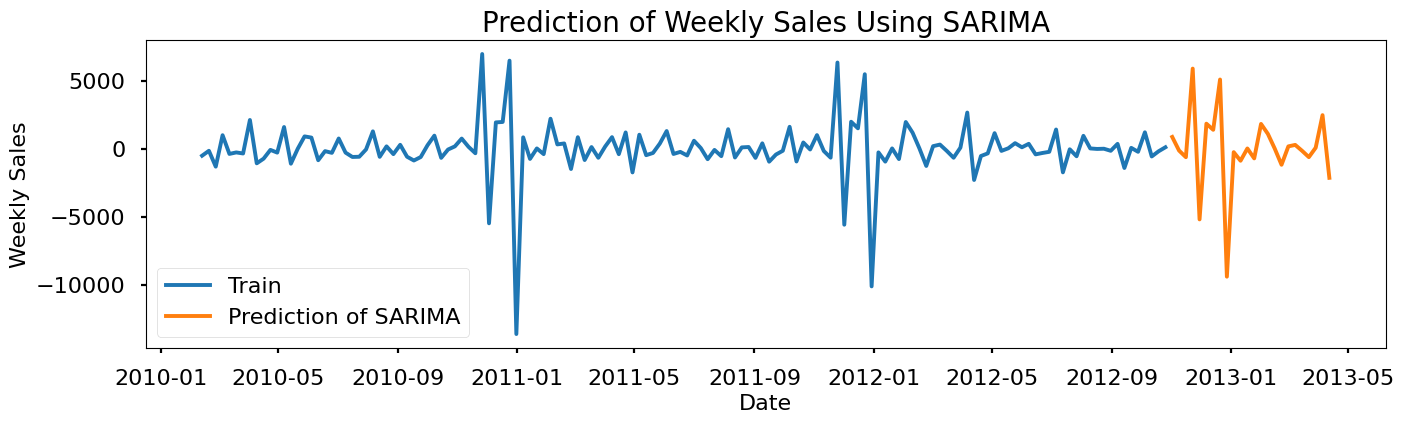

In [84]:
plt.figure(figsize=(16,4))
plt.plot(df_week_diff, label='Train')
plt.title('Prediction of Weekly Sales Using SARIMA', fontsize=20)
plt.plot(future_predictions, label='Prediction of SARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Weekly Sales', fontsize=16)
plt.show()

<b>From the predictions, the seasonal trend of having more sales around the thanksgiving week is very much evident and the model performed well</b>

<center><h1>THE END</h1></center>